In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv(r"E:\vinod sir complete data\vinod sir notes\Machine Learning\Decision Tree\project of decision tree\Heart Disease Prediction\Dataset\HeartDisease.csv")
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

# Building the model on decisionTree

In [6]:
x=data.loc[:,data.columns!='target']
y=data.loc[:,data.columns=='target']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
print('x_train =',len(x_train))
print('x_test =',len(x_test))
print('y_train =',len(y_train))
print('y_test =',len(y_test))

x_train = 242
x_test = 61
y_train = 242
y_test = 61


In [9]:
y_train.value_counts()

target
1         131
0         111
dtype: int64

# Model 

In [10]:
# It is a clasification problem so we are using decision tree classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf=DecisionTreeClassifier()

In [13]:
clfFit=clf.fit(x_train,y_train)
clfFit

DecisionTreeClassifier()

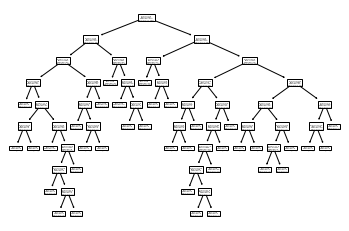

In [14]:
from sklearn import tree
tree.plot_tree(clfFit)
plt.show()

# the max_depth of the tree is 8

## Predictor

In [14]:
y_pred=clf.predict(x_test)

## Confusion matrix and classification report

In [15]:
y_test=y_test.iloc[:,0]    # the data should be in 1 dimention or series

In [16]:
cm_tree=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
cm_tree

Predicted,0,1,All
Actual,,,
0,22,5,27
1,8,26,34
All,30,31,61


# By using the function you can easily make it

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[22,  5],
       [ 8, 26]], dtype=int64)

## Now will print the Classification Report

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# Find the accuracy score

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7868852459016393

# ROC Curve [Receiver Operating Characteristic curve]

In [20]:
pred_prob_test=clfFit.predict_proba(x_test)[:,1]

In [21]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred_prob_test)

In [22]:
data_roc=pd.DataFrame(dict(fpr=fpr,tpr=tpr))
data_roc

,fpr,tpr
0,0.000000,0.000000
1,0.185185,0.764706
2,1.000000,1.000000


In [23]:
auc=auc(fpr,tpr)
auc

0.789760348583878

In [24]:
score=roc_auc_score(y_test,y_pred)
score

0.789760348583878

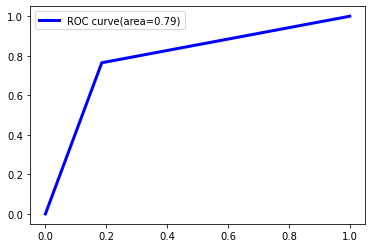

In [25]:
plt.plot(fpr,tpr,color='blue',lw=3,label='ROC curve(area=%.2f)'% auc)
plt.legend(loc='best')
plt.show()

In [ ]:
# just to check the accuracy based on different depth

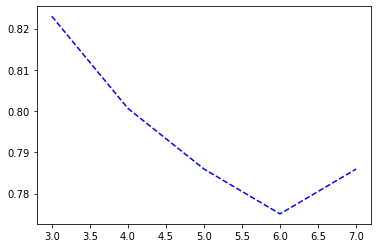

In [29]:

depth=[3, 4, 5, 6, 7]
accuracy_score=[]
for i in depth:
    clf=DecisionTreeClassifier(max_depth=i)
    clfFit=clf.fit(x_train,y_train)
    y_pred=clfFit.predict(x_test)
    accuracy_score.append(roc_auc_score(y_test,y_pred))
    
    
plt.plot(depth,accuracy_score,'b--')
plt.show()